In [201]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Input
## Mean

In [203]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
means = [] 
axs = axs.flatten()
for i in range(10):
        means.append(np.mean(x_train[y_train == i], axis=0))
        axs[i].imshow(means[-1], cmap="Greens")
        
mean_any = np.mean(x_train, axis=0)
None

## Squared difference from mean

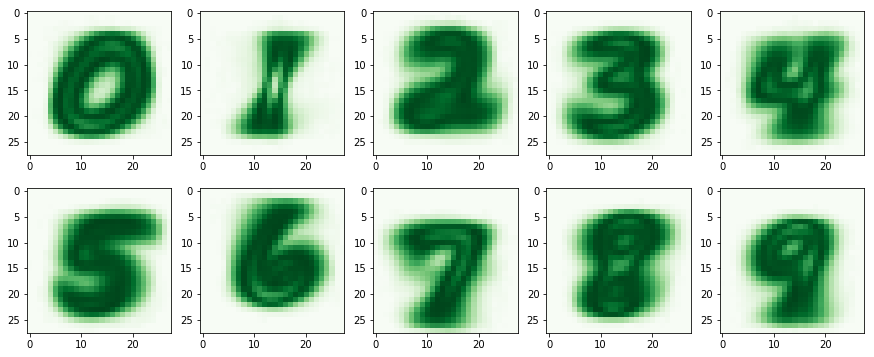

In [204]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()
for i in range(10):
        axs[i].imshow(np.sqrt(np.mean(((x_train[y_train == i] - means[i])**2), axis=0)), cmap="Greens")
        
None

# Prepare data 

In [435]:
import pandas as pd
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

input = pd.DataFrame(to_categorical(y_train), columns=["is_%d" % d for d in range(10)])

x_train_img = x_train.reshape(x_train.shape[0], 28, 28) / 256
grid = np.linspace(0, 1, 28)

y_means = np.mean(x_train_img, axis=2)
y_means /= y_means.sum(axis=1).reshape(y_means.shape[0], 1)
y_pos = (y_means * grid).sum(axis=1)
y_width = np.sqrt((y_means * grid**2).sum(axis=1))

x_means = np.mean(x_train_img, axis=1)
x_means /= x_means.sum(axis=1).reshape(x_means.shape[0], 1)
x_pos = (x_means * grid).sum(axis=1)
x_width = np.sqrt((y_means * grid**2).sum(axis=1))

input['x_pos'] = (x_pos - x_pos.mean()) / x_pos.std()
input['y_pos'] = (y_pos - y_pos.mean()) / y_pos.std()
input['x_width'] = (x_width - x_width.mean()) / x_width.std()
input['y_width'] = (y_width - y_width.mean()) / y_width.std()

N_rnd = 2000
for i in range(N_rnd):
    input["rnd_%d" % i] = np.random.randint(2, size=len(y_train), dtype='bool')
    
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])

# Neural Network

In [436]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD

In [445]:
model = Sequential()
model.add(Dense(units=1000, activation='relu', input_dim=14 + N_rnd))
model.add(Dense(units=28 * 28))

sgd = SGD()
model.compile(loss='mean_squared_error', optimizer=sgd)

history = model.fit(input, x_train, validation_split=0.2, epochs=20, batch_size=32)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 77s 2ms/step - loss: 4443.6275 - val_loss: 4213.1894
Epoch 2/20
48000/48000 [==============================] - 77s 2ms/step - loss: 4205.4489 - val_loss: 3985.1821
Epoch 3/20
48000/48000 [==============================] - 67s 1ms/step - loss: 4028.4033 - val_loss: 4520.6663
Epoch 4/20
48000/48000 [==============================] - 74s 2ms/step - loss: 3853.3166 - val_loss: 3811.0704
Epoch 5/20
48000/48000 [==============================] - 68s 1ms/step - loss: 3663.4295 - val_loss: 3571.0948
Epoch 6/20
48000/48000 [==============================] - 70s 1ms/step - loss: 3539.5370 - val_loss: 3801.8498
Epoch 7/20
48000/48000 [==============================] - 78s 2ms/step - loss: 3449.9360 - val_loss: 3443.3220
Epoch 8/20
48000/48000 [==============================] - 70s 1ms/step - loss: 3394.1000 - val_loss: 3480.9856
Epoch 9/20
48000/48000 [==============================] - 79s 

In [446]:
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label="Validation")
plt.legend()

In [447]:
def mk(d, x=0, y=0, wx=0, wy=0):
    """
    Creates a random input array for the given digit.
    """
    return np.concatenate([to_categorical(d, num_classes=10), [x, y, wx, wy], np.random.normal(size=N_rnd)]).reshape(1, 14 + N_rnd)

In [448]:
def predict(input):
    return model.predict(input).reshape(28, 28)

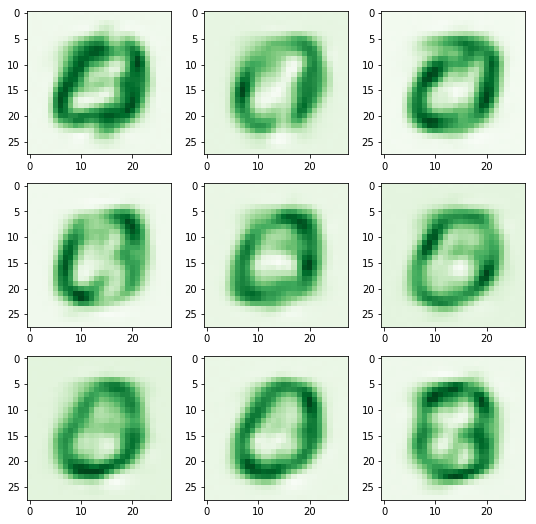

In [449]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
axs = axs.flatten()
for i in range(3):
    for j in range(3):
        axs[3 * i + j].imshow(predict(mk(0, wx=i - 1, wy=j - 1)), cmap="Greens")

In [450]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for i in range(3):
    axs[i].imshow(x_train[y_train==6][i].reshape(28, 28), cmap="Greens")